In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
import calendar
import pickle

In [3]:
path = "rainfallmm.csv"

rain = pd.read_csv(path)
rain

,Year,Month Average,Rainfall - (MM)
0,1991,Jan Average,38.2847
1,1991,Feb Average,12.7492
2,1991,Mar Average,73.3656
3,1991,Apr Average,83.1350
4,1991,May Average,112.2750
...,...,...,...
307,2016,Aug Average,25.5342
308,2016,Sep Average,15.1428
309,2016,Oct Average,40.0055
310,2016,Nov Average,121.9970


In [4]:
def month_to_num(x):
    date_str = f'2000-{x}-21'
    
    timestamp = pd.Timestamp(date_str)
    return timestamp.month



month = rain['Month Average'].str.replace(" Average", '')
month = month.apply(lambda x: month_to_num(x))

rain['Month Average'] = month
rain

,Year,Month Average,Rainfall - (MM)
0,1991,1,38.2847
1,1991,2,12.7492
2,1991,3,73.3656
3,1991,4,83.1350
4,1991,5,112.2750
...,...,...,...
307,2016,8,25.5342
308,2016,9,15.1428
309,2016,10,40.0055
310,2016,11,121.9970


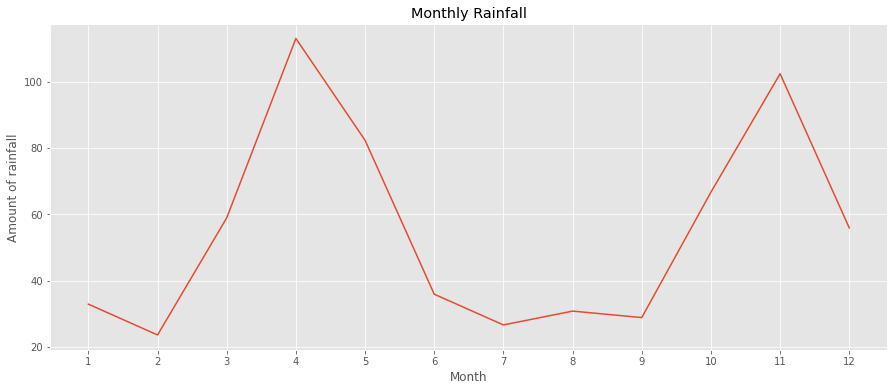

In [5]:
data = rain.groupby('Month Average').mean()['Rainfall - (MM)']




plt.style.use('ggplot')
chart = data.plot(kind = 'line', figsize = (15, 6));
chart.set_title("Monthly Rainfall");
chart.set_xlabel("Month");
chart.set_ylabel("Amount of rainfall");
plt.xticks(list(data.index));

# plt.savefig("charts/TRANSACTION TYPE RANKED BY AMOUNT TRANSACTED.png", bbox_inches='tight')

In [6]:
subset = rain.pivot('Year', 'Month Average', 'Rainfall - (MM)')
subset

Month Average,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
1991,38.28470,12.74920,73.3656,83.1350,112.2750,33.6106,36.6575,32.8066,18.31840,41.2266,60.2294,53.42320
1992,10.24910,15.91250,17.0754,119.9190,80.6001,30.0842,35.1079,28.0127,24.31210,47.1624,106.8240,98.41720
1993,80.93180,53.66750,24.0511,77.5293,110.6640,50.2024,14.9912,21.9237,15.61030,42.0606,75.1036,40.12320
1994,6.64417,17.62020,47.8114,111.0380,82.2793,33.7607,44.5223,31.9213,20.17740,69.6349,168.3970,54.45300
1995,10.57990,37.30850,69.4802,150.3580,66.9476,23.5026,27.0207,32.2454,30.57470,87.7315,72.5827,43.81250
1996,24.30530,27.96050,74.9097,71.0857,85.9180,50.8206,33.8330,25.6055,23.94950,19.2856,85.8530,6.98666
1997,8.74094,1.15765,45.8383,188.3230,63.3745,46.6663,29.0068,28.8858,7.70611,179.6690,247.0810,116.06200
1998,76.28710,59.96950,50.1806,115.3340,149.3050,69.6817,36.8900,29.2989,22.47750,30.0269,72.0040,12.86530
1999,17.41850,3.90971,85.2266,95.0840,56.7194,30.8994,34.1242,37.8536,22.05810,62.4518,105.1640,46.18160


In [7]:
def reorder(month):
    data_ = np.array(subset)
    new_subset = []
    year = 1991

    for i in range(len(data_)):
        if i != (len(data_)-1):
            new_dat = [year]
            new_dat.extend(list(data_[i][month:]))
            new_dat.extend(data_[i+1][:month])

    #         data_to_add = [subset[i+1].mean() for i in range(month)]
            new_subset.append(new_dat)

        else:
            new_dat = [year]
            new_dat.extend(list(data_[i][month:]))
            x = [subset[x].mean() for x in range(1, month+1)]
            new_dat.extend(x)
            new_subset.append(new_dat)

        year+= 1
        
    col = ['Year']
    month = month+1
    col.extend([calendar.month_name[i] for i in range(month, 13)])
    col.extend([calendar.month_name[i] for i in range(1, month)])


    new_df = pd.DataFrame(new_subset, columns = col)
    return new_df

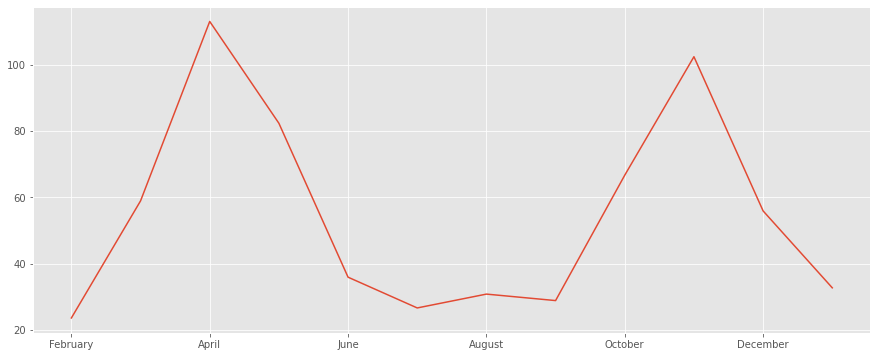

In [8]:
data = reorder(1).drop('Year', axis = 1).mean().plot(figsize = (15, 6));


# plt.savefig("charts/TRANSACTION TYPE RANKED BY AMOUNT TRANSACTED.png", bbox_inches='tight')

In [9]:
x = np.array(reorder(1)[['February', 'May','October']])
y = np.array(reorder(1)['January'])



linear = linear_model.LinearRegression()


best = 0
acc = 0
trained = 0
while acc < 0.94:
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.2)

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    
    if acc > best:
        model = linear
        print(f'Test number {trained}: {acc}')
        best = acc    
    
    trained += 1
    
#     print(f'Test number {trained}: {acc}')



prediction = model.predict(x_test)
with open(f'january_prediction_model.pickle', 'wb') as f:
            pickle.dump(model, f)



for x in range(len(prediction)):
    print(f'{prediction[x]} : {x_test[x]} : {y_test[x]}')

Test number 2: 0.3821302740609748
Test number 11: 0.4280517362894707
Test number 15: 0.5972944924152601
Test number 17: 0.7969830661578671
Test number 76: 0.8556055442945527
Test number 84: 0.8648334851819276
Test number 402: 0.8896544072662914
Test number 451: 0.9318792133185982
Test number 1053: 0.9398856789437581
Test number 1542: 0.9449199246974215
22.097434129538453 : [34.7628 66.4223 63.8456] : 26.2482
69.10971780434367 : [  1.15765  63.3745  179.669  ] : 76.2871
45.05199441119393 : [15.5346 95.6116 89.3439] : 42.9715
39.69559886726036 : [22.2449 83.3955 94.12  ] : 34.3716
28.61377035229582 : [25.0993 90.5702 46.6673] : 26.4445
25.69593819680476 : [37.3085 66.9476 87.7315] : 24.3053


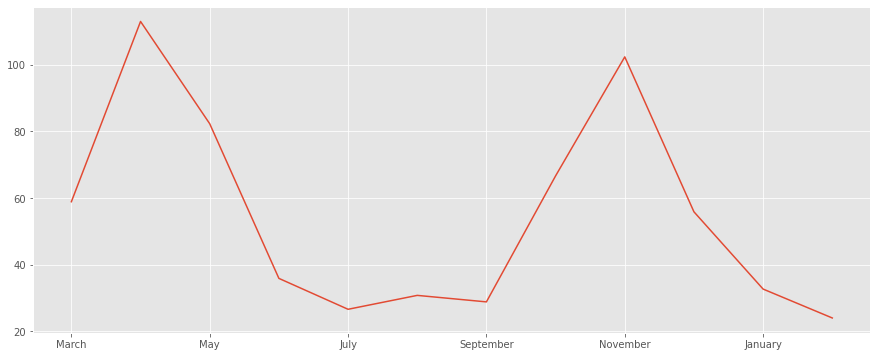

In [10]:
data = reorder(2).drop('Year', axis = 1).mean().plot(figsize = (15, 6));


In [11]:
x = np.array(reorder(2)[['May', 'October']])
y = np.array(reorder(2)['February'])



linear = linear_model.LinearRegression()


best = 0
acc = 0
trained = 0
while acc < 0.81:
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.2)

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    
    if acc > best:
        model = linear
        print(f'Test number {trained}: {acc}')
        best = acc    
    
    trained += 1
    
#     print(f'Test number {trained}: {acc}')



prediction = model.predict(x_test)
with open(f'february_prediction_model.pickle', 'wb') as f:
            pickle.dump(model, f)



for x in range(len(prediction)):
    print(f'{prediction[x]} : {x_test[x]} : {y_test[x]}')

Test number 1: 0.41625880980541274
Test number 26: 0.4204190134654455
Test number 27: 0.5236253139046882
Test number 32: 0.6156293097520933
Test number 37: 0.6479520877381517
Test number 219: 0.6674990536267602
Test number 622: 0.7522160711719232
Test number 701: 0.7847680660621158
Test number 7544: 0.7929160307422563
Test number 8001: 0.8142814689124304
17.092217316440408 : [112.275   41.2266] : 15.9125
11.590100714223269 : [149.305   30.0269] : 3.90971
28.60954675331699 : [63.9306 86.2573] : 28.0516
34.04408667926556 : [ 72.8358 130.978 ] : 44.5868
15.318496179958336 : [126.015   38.9502] : 17.7408
28.501429219824377 : [66.9476 87.7315] : 27.9605


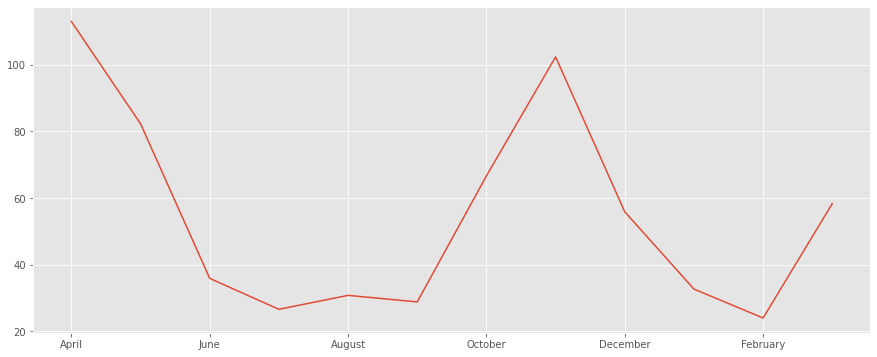

In [12]:
data = reorder(3).drop('Year', axis = 1).mean().plot(figsize = (15, 6));


In [13]:
x = np.array(reorder(3)[['October','November', 'December']])
y = np.array(reorder(3)['March'])



linear = linear_model.LinearRegression()


best = 0
acc = 0
trained = 0
while acc < 0.81:
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.2)

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    
    if acc > best:
        model = linear
        print(f'Test number {trained}: {acc}')
        best = acc    
    
    trained += 1
    
#     print(f'Test number {trained}: {acc}')



prediction = model.predict(x_test)
with open(f'march_prediction_model.pickle', 'wb') as f:
            pickle.dump(model, f)



for x in range(len(prediction)):
    print(f'{prediction[x]} : {x_test[x]} : {y_test[x]}')

Test number 4: 0.01077701050722879
Test number 5: 0.03904492983906693
Test number 19: 0.21732553845228475
Test number 63: 0.2392134797134423
Test number 64: 0.253978219265654
Test number 79: 0.45525013727384844
Test number 103: 0.6454257773202123
Test number 184: 0.6462463780394694
Test number 287: 0.7529077167798045
Test number 5284: 0.7996292809204676
Test number 11615: 0.8179762838288311
78.9013712068072 : [130.978   77.4053  89.9905] : 96.3101
45.178341926050045 : [19.2856  85.853    6.98666] : 45.8383
47.75858125208436 : [ 94.12   174.698   79.3671] : 50.4786
57.41509411888083 : [ 40.0055 121.997  100.261 ] : 58.889803846153846
56.46952478691237 : [54.8905 76.8925 28.327 ] : 60.4919
41.15962511202071 : [ 40.8778 130.099   26.9851] : 44.18


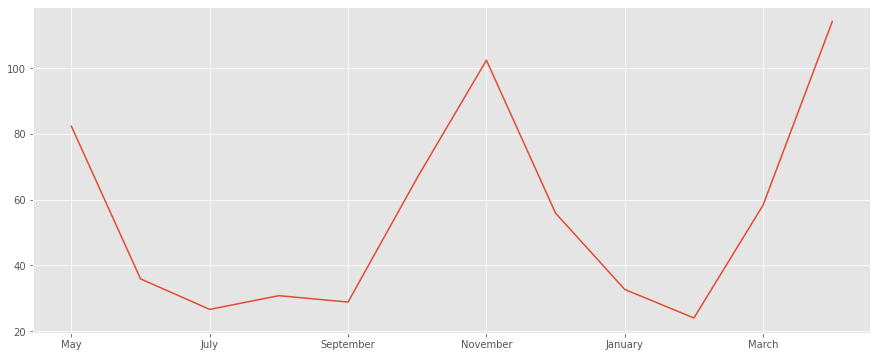

In [14]:
data = reorder(4).drop('Year', axis = 1).mean().plot(figsize = (15, 6));


In [15]:
x = np.array(reorder(4)[['May', 'November','August','October']])
y = np.array(reorder(4)['April'])



linear = linear_model.LinearRegression()


best = 0
acc = 0
trained = 0
while acc < 0.75:
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.2)

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    
    if acc > best:
        model = linear
        print(f'Test number {trained}: {acc}')
        best = acc    
    
    trained += 1
    
#     print(f'Test number {trained}: {acc}')



prediction = model.predict(x_test)
with open(f'april_prediction_model.pickle', 'wb') as f:
            pickle.dump(model, f)



for x in range(len(prediction)):
    print(f'{prediction[x]} : {x_test[x]} : {y_test[x]}')

Test number 0: 0.0004632528837524852
Test number 1: 0.3165187340234341
Test number 16: 0.33122194651274084
Test number 21: 0.41296950650516595
Test number 58: 0.45821589316421685
Test number 80: 0.48886298045493737
Test number 125: 0.619074400778573
Test number 464: 0.6861573603706628
Test number 7423: 0.6878388870060701
Test number 8533: 0.7177017182586307
Test number 11410: 0.7382169544798531
Test number 26883: 0.7431550960100752
Test number 41774: 0.745161322643311
Test number 61687: 0.7466288853253422
Test number 84520: 0.7552958294320803
151.14140190276413 : [101.457  163.608   17.9734  64.3615] : 166.705
133.5555353157394 : [ 82.2793 168.397   31.9213  69.6349] : 150.358
95.47881383897175 : [ 72.8358  77.4053  19.4447 130.978 ] : 109.239
118.05520852856168 : [ 83.3955 174.698   44.2328  94.12  ] : 105.91
98.58980864134958 : [52.9646 76.8925 32.591  54.8905] : 102.772
107.31755160171771 : [ 63.9306 110.582   29.2983  86.2573] : 92.9484


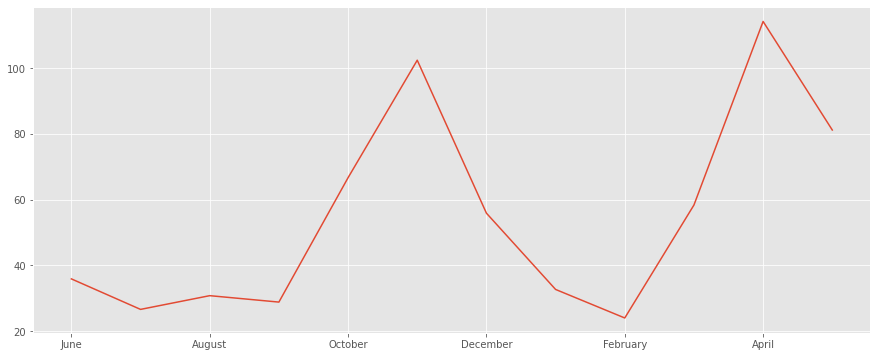

In [16]:
data = reorder(5).drop('Year', axis = 1).mean().plot(figsize = (15, 6));

In [17]:
x = np.array(reorder(5)[['September', 'October', 'December']])
y = np.array(reorder(5)['May'])



linear = linear_model.LinearRegression()


best = 0
acc = 0
trained = 0
while acc < 0.91:
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.2)

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    
    if acc > best:
        model = linear
        print(f'Test number {trained}: {acc}')
        best = acc    
    
    trained += 1
    
#     print(f'Test number {trained}: {acc}')



prediction = model.predict(x_test)
with open(f'may_prediction_model.pickle', 'wb') as f:
            pickle.dump(model, f)



for x in range(len(prediction)):
    print(f'{prediction[x]} : {x_test[x]} : {y_test[x]}')

Test number 3: 0.26459595168862193
Test number 4: 0.5493670023012133
Test number 83: 0.5621818954793579
Test number 320: 0.6151141464602977
Test number 341: 0.6344612121211741
Test number 343: 0.7016740494188635
Test number 2065: 0.7219694069744407
Test number 3345: 0.7410089702759923
Test number 8537: 0.7564776676002815
Test number 10150: 0.7629001080956147
Test number 11979: 0.7933065817572893
Test number 14794: 0.7996818076360097
Test number 18563: 0.8036309238543264
Test number 21386: 0.8908182374887196
Test number 37448: 0.9053519041324642
Test number 101969: 0.9053519041324644
Test number 186525: 0.9082568953884979
Test number 189021: 0.908256895388498
Test number 200705: 0.9103687466339743
89.90586546074151 : [49.3262 94.12   79.3671] : 90.5702
76.70925072422108 : [18.3184 41.2266 53.4232] : 80.6001
74.00557382024827 : [32.8981 86.2573 13.715 ] : 72.8358
67.61314150099571 : [66.5627 46.6673 48.9737] : 63.9306
82.67762560029146 : [30.5747 87.7315 43.8125] : 85.918
62.683092402085

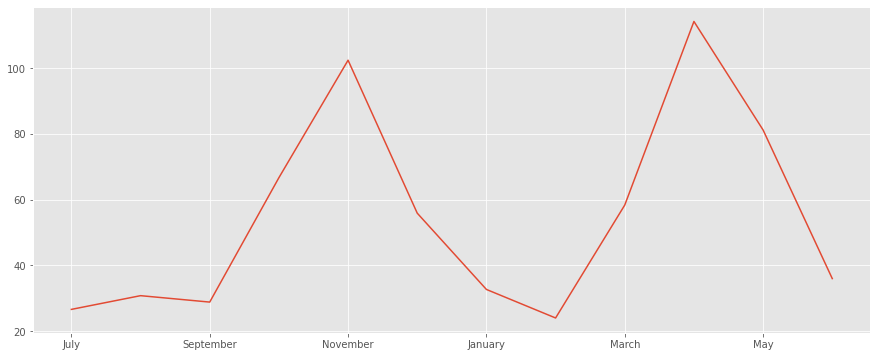

In [18]:
data = reorder(6).drop('Year', axis = 1).mean().plot(figsize = (15, 6));


In [19]:
x = np.array(reorder(6)[['September', 'January', 'July', 'August']])
y = np.array(reorder(6)['June'])



linear = linear_model.LinearRegression()


best = 0
acc = 0
trained = 0
while acc < 0.8:
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.2)

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    
    if acc > best:
        model = linear
        print(f'Test number {trained}: {acc}')
        best = acc    
    
    trained += 1
    
#     print(f'Test number {trained}: {acc}')



prediction = model.predict(x_test)
with open(f'june_prediction_model.pickle', 'wb') as f:
            pickle.dump(model, f)



for x in range(len(prediction)):
    print(f'{prediction[x]} : {x_test[x]} : {y_test[x]}')

Test number 11: 0.08365170821986267
Test number 15: 0.27611574402754036
Test number 35: 0.40557405622424747
Test number 71: 0.45230448125159717
Test number 400: 0.6381214506346436
Test number 2923: 0.8399976906478069
37.69105802439363 : [15.1428     32.87700423 34.5489     25.5342    ] : 35.87772692307692
34.640247845063925 : [32.8981 32.8746 21.3722 29.2983] : 30.4692
27.503178993348318 : [41.4186 10.7769 18.8563 26.1242] : 29.297
34.49371672015758 : [22.0581 14.7556 34.1242 37.8536] : 37.8617
47.69249421491658 : [24.3121 80.9318 35.1079 28.0127] : 50.2024
36.291561109273815 : [35.2312 46.5721 18.9236 23.6642] : 38.07


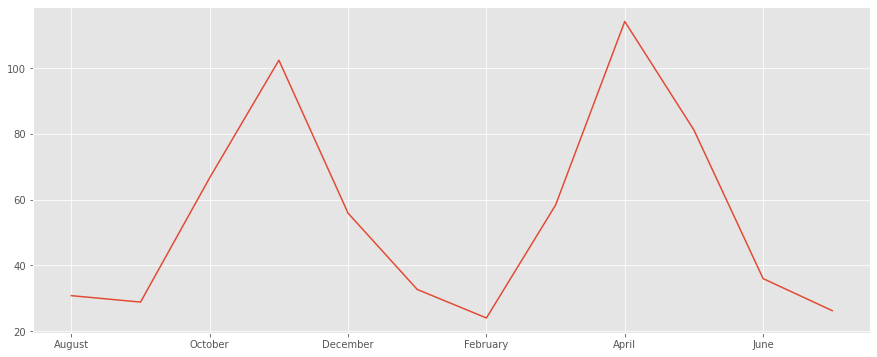

In [20]:
data = reorder(7).drop('Year', axis = 1).mean().plot(figsize = (15, 6));


In [23]:
x = np.array(reorder(7)[['November','February', 'April']])
y = np.array(reorder(7)['July'])



linear = linear_model.LinearRegression()


best = 0
acc = 0
trained = 0
while acc < 0.77:
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.2)

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    
    if acc > best:
        model = linear
        print(f'Test number {trained}: {acc}')
        best = acc    
    
    trained += 1
    
#     print(f'Test number {trained}: {acc}')



prediction = model.predict(x_test)
with open(f'july_prediction_model.pickle', 'wb') as f:
            pickle.dump(model, f)



for x in range(len(prediction)):
    print(f'{prediction[x]} : {x_test[x]} : {y_test[x]}')

Test number 1: 0.2358493478589866
Test number 2: 0.4071305132402797
Test number 39: 0.45809033269682853
Test number 208: 0.4926349129600912
Test number 230: 0.49541865488394243
Test number 387: 0.5521895762820771
Test number 942: 0.5553842156803335
Test number 2163: 0.6489830560812019
Test number 2857: 0.661527926490111
Test number 3837: 0.6671137794662811
Test number 4188: 0.6759200022887095
Test number 6740: 0.7320397057091605
Test number 9484: 0.7351953944838832
Test number 11978: 0.7356607881513668
Test number 16486: 0.7531870277351433
Test number 25621: 0.7938646756597387
31.737269258299825 : [163.608  18.22  166.705] : 34.5489
29.010483533094096 : [113.547   15.5346 107.882 ] : 26.9273
28.02145976912232 : [ 85.853     1.15765 188.323  ] : 29.0068
22.03601136599152 : [57.0503 28.524  85.7628] : 21.3722
28.720165258487608 : [168.397   37.3085 150.358 ] : 27.0207
28.078585229421442 : [121.997       23.57624731 113.00448462] : 26.602380769230763


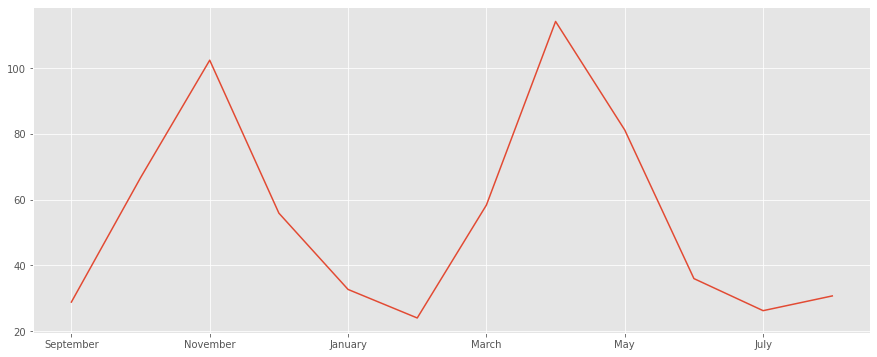

In [24]:
data = reorder(8).drop('Year', axis = 1).mean().plot(figsize = (15, 6));


In [28]:
x = np.array(reorder(8)[['November', 'December','January','March']])
y = np.array(reorder(8)['August'])



linear = linear_model.LinearRegression()


best = 0
acc = 0
trained = 0
while acc < 0.7:
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.2)

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    
    if acc > best:
        model = linear
        print(f'Test number {trained}: {acc}')
        best = acc    
    
    trained += 1
    
#     print(f'Test number {trained}: {acc}')



prediction = model.predict(x_test)
with open(f'august_prediction_model.pickle', 'wb') as f:
            pickle.dump(model, f)



for x in range(len(prediction)):
    print(f'{prediction[x]} : {x_test[x]} : {y_test[x]}')

Test number 1: 0.017028045096817768
Test number 8: 0.194684637307727
Test number 17: 0.37239573039711704
Test number 53: 0.4256424925348997
Test number 58: 0.6540175240457002
Test number 190: 0.6625309830661196
Test number 284: 0.6805734515489328
Test number 598: 0.7200908233767169
32.22300122730734 : [121.997      100.261       32.87700423  58.88980385] : 30.776165384615386
36.057381184227594 : [ 57.0503  48.9737  26.4445 121.991 ] : 29.2983
29.263005159492696 : [163.608   63.2356  56.7251  30.4865] : 25.5342
23.204585362779067 : [76.8925 28.327  73.4348 60.4919] : 27.1292
43.16302380875281 : [124.175  110.374   42.9715 145.511 ] : 51.8061
19.512820429193816 : [106.824   98.4172  80.9318  24.0511] : 21.9237


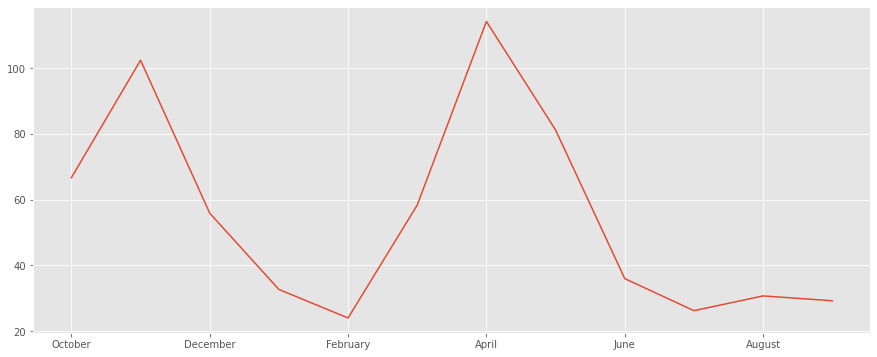

In [29]:
data = reorder(9).drop('Year', axis = 1).mean().plot(figsize = (15, 6));

In [30]:
x = np.array(reorder(9)[['November', 'March', 'May']])
y = np.array(reorder(9)['September'])



linear = linear_model.LinearRegression()


best = 0
acc = 0
trained = 0
while acc < 0.8:
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.2)

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    
    if acc > best:
        model = linear
        print(f'Test number {trained}: {acc}')
        best = acc    
    
    trained += 1
    
#     print(f'Test number {trained}: {acc}')



prediction = model.predict(x_test)
with open(f'september_prediction_model.pickle', 'wb') as f:
            pickle.dump(model, f)



for x in range(len(prediction)):
    print(f'{prediction[x]} : {x_test[x]} : {y_test[x]}')

Test number 3: 0.15160722534987459
Test number 15: 0.482359842579146
Test number 59: 0.6333955722065838
Test number 264: 0.6888681399940213
Test number 2724: 0.8804695176341117
21.928924185256655 : [60.2294 17.0754 80.6001] : 24.3121
24.815924134682305 : [71.3184 45.8558 50.3418] : 23.9635
40.87923748331284 : [124.175  145.511   68.7326] : 45.2457
33.104525615562075 : [168.397   69.4802  66.9476] : 30.5747
34.51826735633435 : [ 57.0503 121.991   63.9306] : 32.8981
30.252480137806742 : [121.997       58.88980385  82.29929231] : 28.823138846153842


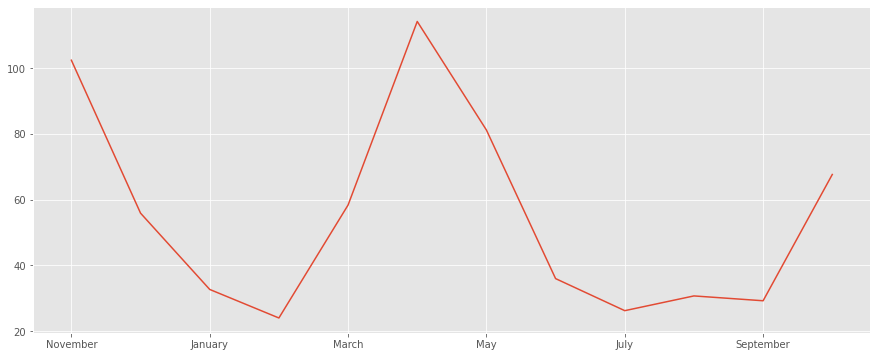

In [31]:
data = reorder(10).drop('Year', axis = 1).mean().plot(figsize = (15, 6));

In [32]:
x = np.array(reorder(10)[['December', 'March', 'May']])
y = np.array(reorder(10)['October'])



linear = linear_model.LinearRegression()


best = 0
acc = 0
trained = 0
while acc < 0.92:
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.2)

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    
    if acc > best:
        model = linear
        print(f'Test number {trained}: {acc}')
        best = acc    
    
    trained += 1
    
#     print(f'Test number {trained}: {acc}')



prediction = model.predict(x_test)
with open(f'october_prediction_model.pickle', 'wb') as f:
            pickle.dump(model, f)



for x in range(len(prediction)):
    print(f'{prediction[x]} : {x_test[x]} : {y_test[x]}')

Test number 0: 0.23734927423236563
Test number 1: 0.3501541681606709
Test number 3: 0.6406920840063443
Test number 4: 0.813977317192831
Test number 113: 0.8257829833388712
Test number 714: 0.8859891434613194
Test number 2620: 0.9199401981802083
Test number 16074: 0.9277476894979446
42.563978331912644 : [ 98.4172  24.0511 110.664 ] : 42.0606
77.84687970751229 : [40.1232 47.8114 82.2793] : 69.6349
34.683476475074826 : [116.062   50.1806 149.305 ] : 30.0269
91.83520865492834 : [18.656  82.786  83.3955] : 94.12
77.47510010505607 : [42.9499 23.3394 95.6116] : 89.3439
29.773965637285798 : [110.374  145.511   68.7326] : 36.5215


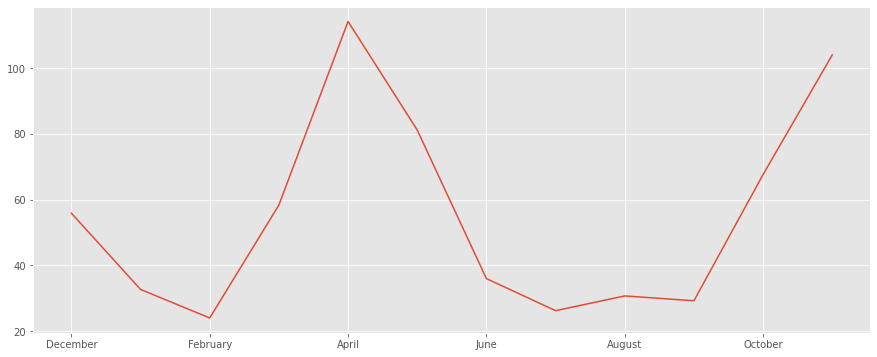

In [33]:
data = reorder(11).drop('Year', axis = 1).mean().plot(figsize = (15, 6));

In [35]:
x = np.array(reorder(11)[['December', 'March', 'April', 'May']])
y = np.array(reorder(11)['November'])



linear = linear_model.LinearRegression()


best = 0
acc = 0
trained = 0
while acc < 0.8:
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.2)

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    
    if acc > best:
        model = linear
        print(f'Test number {trained}: {acc}')
        best = acc    
    
    trained += 1
    
#     print(f'Test number {trained}: {acc}')



prediction = model.predict(x_test)
with open(f'november_prediction_model.pickle', 'wb') as f:
            pickle.dump(model, f)



for x in range(len(prediction)):
    print(f'{prediction[x]} : {x_test[x]} : {y_test[x]}')

Test number 2: 0.2872262152804914
Test number 14: 0.5472249077589348
Test number 120: 0.5637469537192409
Test number 252: 0.7157113176565504
Test number 1241: 0.7353687050597133
Test number 1372: 0.7618969902196782
Test number 6991: 0.7870102604275251
Test number 16737: 0.8567777589951702
102.90373820617593 : [ 48.9737 121.991   85.7628  63.9306] : 110.582
109.6578458280902 : [ 63.2356  30.4865 166.705   70.6712] : 121.997
77.6544043008869 : [116.062   50.1806 115.334  149.305 ] : 72.004
99.57549768479348 : [ 53.4232  17.0754 119.919   80.6001] : 106.824
85.85542117073516 : [110.374  145.511  152.402   68.7326] : 84.2852
77.03797462484142 : [46.1816 32.876  68.5452 52.9646] : 76.8925


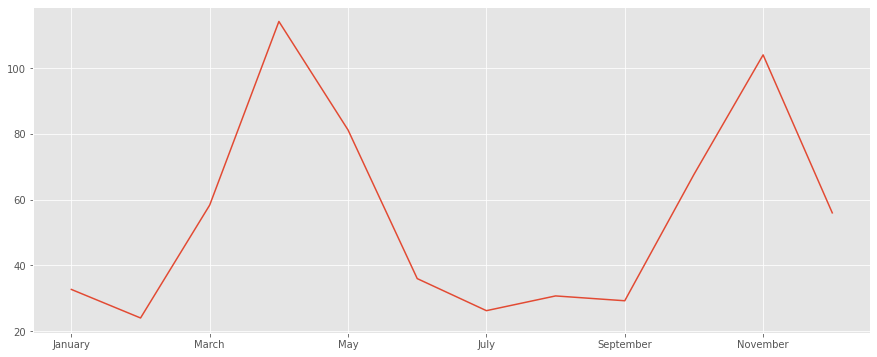

In [36]:
data = reorder(12).drop('Year', axis = 1).mean().plot(figsize = (15, 6));

In [37]:
x = np.array(reorder(12)[['March','April', 'May', 'June']])
y = np.array(reorder(12)['December'])



linear = linear_model.LinearRegression()


best = 0
acc = 0
trained = 0
while acc < 0.93:
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.2)

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    
    if acc > best:
        model = linear
        print(f'Test number {trained}: {acc}')
        best = acc    
    
    trained += 1
    
#     print(f'Test number {trained}: {acc}')



prediction = model.predict(x_test)
with open(f'december_prediction_model.pickle', 'wb') as f:
            pickle.dump(model, f)



for x in range(len(prediction)):
    print(f'{prediction[x]} : {x_test[x]} : {y_test[x]}')

Test number 0: 0.1372499889571872
Test number 7: 0.2307518288032696
Test number 13: 0.40092744182674966
Test number 18: 0.43489174454397106
Test number 22: 0.5783625714082279
Test number 26: 0.5945992453908739
Test number 36: 0.7204584984306467
Test number 71: 0.8119747481071022
Test number 243: 0.8692967375088448
Test number 4361: 0.8965955679599587
Test number 5038: 0.9038256717186951
Test number 8797: 0.9071652091153203
Test number 10320: 0.9253224039512623
Test number 14200: 0.9801375487670526
39.481039979648486 : [ 96.3101 109.239   72.8616  45.9529] : 42.677
58.439216928213796 : [ 47.8114 111.038   82.2793  33.7607] : 54.453
54.43757470704731 : [ 58.88980385 113.00448462  82.29929231  35.87772692] : 55.86499461538461
97.78991314468735 : [ 30.4865 166.705   70.6712  34.905 ] : 100.261
46.96953460851434 : [85.2266 95.084  56.7194 30.8994] : 46.1816
36.31588695454994 : [ 24.0511  77.5293 110.664   50.2024] : 40.1232


In [38]:
# File to predict should have:
    
# Columns: Year,Month,Day, Rainfall
# At least 24 months pf data
# Be in a CSV file

In [39]:
filepath = f"testing_data.csv"

df = pd.read_csv(filepath)
data = df.groupby('Month').mean()['Rainfall']
January = data.January
February = data.February
March = data.March
April = data.April
May = data.May
June = data.June
July = data.July
August = data.August
September = data.September
October = data.October
November = data.November
December = data.December

lastmonth = df.iloc[-1].Month



# average_data = df.pivot('Year', 'Month', 'Rainfall').mean()
# average_data.str.replace(' Average', '')

In [40]:
def get_months_order(month):
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    return_data = months[months.index(month)+1:]
    return_data.extend(months[:months.index(month)+1])

    return return_data


In [49]:
order = get_months_order(lastmonth)
plotting_data = []
for prediction in order:
    if prediction == 'January':
        pickle_in = open('january_prediction_model.pickle', 'rb')
        model = pickle.load(pickle_in)
        

        value = model.predict(np.array([[February, May, October]]))
        plotting_data.append(value[0])
        
    elif prediction == 'February':
        pickle_in = open('february_prediction_model.pickle', 'rb')
        model = pickle.load(pickle_in)     

        value = model.predict(np.array([[May, October]]))
        plotting_data.append(value[0])
        
    elif prediction == 'March':
        pickle_in = open('march_prediction_model.pickle', 'rb')
        model = pickle.load(pickle_in)     

        value = model.predict(np.array([[October, November, December]]))
        plotting_data.append(value[0])
        
    elif prediction == 'April':
        pickle_in = open('april_prediction_model.pickle', 'rb')
        model = pickle.load(pickle_in)     

        value = model.predict(np.array([[May, November, August, October]]))
        plotting_data.append(value[0])
        
    elif prediction == 'May':
        pickle_in = open('may_prediction_model.pickle', 'rb')
        model = pickle.load(pickle_in)     

        value = model.predict(np.array([[September, October, December]]))
        plotting_data.append(value[0])
    
    elif prediction == 'June':
        pickle_in = open('june_prediction_model.pickle', 'rb')
        model = pickle.load(pickle_in)     

        value = model.predict(np.array([[September, January, July, August]]))
        plotting_data.append(value[0])
        
    elif prediction == 'July':
        pickle_in = open('july_prediction_model.pickle', 'rb')
        model = pickle.load(pickle_in)     

        value = model.predict(np.array([[November, February, April]]))
        plotting_data.append(value[0])
        
    elif prediction == 'August':
        pickle_in = open('august_prediction_model.pickle', 'rb')
        model = pickle.load(pickle_in)     

        value = model.predict(np.array([[November, December, January, March]]))
        plotting_data.append(value[0])
        
    elif prediction == 'September':
        pickle_in = open('september_prediction_model.pickle', 'rb')
        model = pickle.load(pickle_in)     

        value = model.predict(np.array([[November, March, May]]))
        plotting_data.append(value[0])
        
    elif prediction == 'October':
        pickle_in = open('october_prediction_model.pickle', 'rb')
        model = pickle.load(pickle_in)     

        value = model.predict(np.array([[December, March, May]]))
        plotting_data.append(value[0])
        
    elif prediction == 'November':
        pickle_in = open('november_prediction_model.pickle', 'rb')
        model = pickle.load(pickle_in)     

        value = model.predict(np.array([[December, March, April, May]]))
        plotting_data.append(value[0])
        
    elif prediction == 'December':
        pickle_in = open('december_prediction_model.pickle', 'rb')
        model = pickle.load(pickle_in)     

        value = model.predict(np.array([[March, April, May, June]]))
        plotting_data.append(value[0])


In [50]:
print(f'{order}\n{plotting_data}')

['October', 'November', 'December', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September']
[70.09104035923664, 104.15655545185501, 52.25624757989483, 32.8495162308426, 23.149868780612493, 54.257725082018695, 118.12990661516828, 81.31247994935632, 36.35902272470808, 27.194980842341224, 30.998988528053886, 29.002225554527186]


In [ ]:
# df = pd.read_csv('rainfallmm.csv')
# df['Month Average'] = df['Month Average'].str.replace(' Average', '').apply(lambda x: mont_to_num(x))
# # df.set_index('Year', inplace = True)
# df.to_csv('training_data.csv')

In [48]:
value[0]

29.002225554527186